In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd feature-selector


C:\Users\97798\feature-selector


In [3]:
from feature_selector import FeatureSelector


In [4]:
data = pd.read_csv(r"C:\Users\97798\Desktop\datasets\Titanic-Dataset.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_labels = data['Survived']
data = data.drop(columns = ['Survived'])

In [7]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
fs = FeatureSelector(data = data, labels=train_labels)

In [10]:
fs

Missing value

In [11]:
fs.identify_missing(missing_threshold=0.5)
                 

1 features with greater than 0.50 missing values.



In [12]:
missing_features = fs.ops['missing']
fs.missing_stats

,missing_fraction
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000


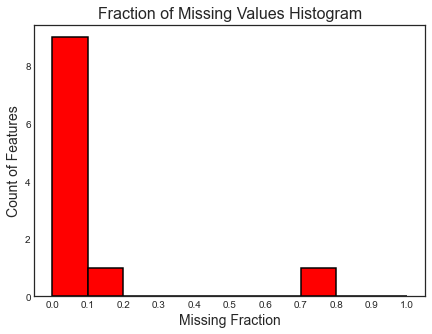

In [13]:
fs.plot_missing()

Detect Highly Correlated data

In [14]:
fs.identify_collinear(correlation_threshold=0.2)

4 features with a correlation magnitude greater than 0.20.



C:\Users\97798\feature-selector\feature_selector\feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)


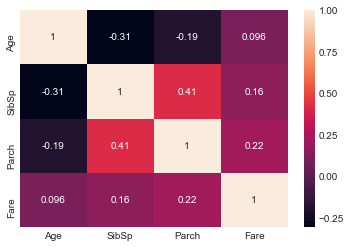

In [15]:
correlated_features = fs.ops['collinear']
correlated_features

correlated_data = data[correlated_features]

# Plot scatter plot matrix
sns.heatmap(data = correlated_data.corr(), annot=True)
plt.show()

Zero Importance features

In [16]:
fs.identify_zero_importance(
    task = 'classification',
    eval_metric = 'auc',
    n_iterations =10,
    early_stopping = True
)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.864097
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[189]	valid_0's auc: 0.862187
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[26]	valid_0's auc: 0.857773
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	valid_0's auc: 0.838867
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[64]	valid_0's auc: 0.901713
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.861594
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.89473
Training until validation scores don't improve for 100 rounds.
Early stopping

In [17]:
fs.data_all

,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem",...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,...,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,0,0,0,0,0,0,0,0,0,0,...,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,0,0,0,0,0,0,0,0,0,0,...,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,0,0,0,0,0,0,0,0,0,0,...,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,0,0,0,0,0,0,0,0,0,...,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,0,0,0,0,0,0,0,0,0,0,...,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,0,0,0,0,0,0,0,0,0,...,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,0,0,0,0,0,0,0,0,0,0,...,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Identify and Plot the features

In [18]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['Ticket_31028',
 'Ticket_315090',
 'Ticket_315089',
 'Ticket_315088',
 'Ticket_315086',
 'Ticket_315084',
 'Ticket_315082',
 'Ticket_315037',
 'Ticket_31418',
 'Ticket_312993',
 'Ticket_312992',
 'Ticket_312991',
 'Name_Abbott, Mr. Rossmore Edward',
 'Ticket_31027',
 'Ticket_3101296',
 'Ticket_3101295',
 'Ticket_3101281',
 'Ticket_3101278',
 'Ticket_3101277',
 'Ticket_3101276',
 'Ticket_3101267',
 'Ticket_3101265',
 'Ticket_3101264',
 'Ticket_29751',
 'Ticket_3101298',
 'Ticket_315094',
 'Ticket_315093',
 'Ticket_330931',
 'Ticket_336439',
 'Ticket_33638',
 'Ticket_335677',
 'Ticket_335097',
 'Ticket_334912',
 'Ticket_330980',
 'Ticket_330979',
 'Ticket_330959',
 'Ticket_330958',
 'Ticket_330935',
 'Ticket_330932',
 'Ticket_330923',
 'Ticket_2926',
 'Ticket_330919',
 'Ticket_330909',
 'Ticket_330877',
 'Ticket_324669',
 'Ticket_323951',
 'Ticket_323592',
 'Ticket_315153',
 'Ticket_315151',
 'Ticket_315098',
 'Ticket_315097',
 'Ticket_315096',
 'Ticket_29750',
 'Ticket_29106',
 'Ticket

Plot Feature Importance

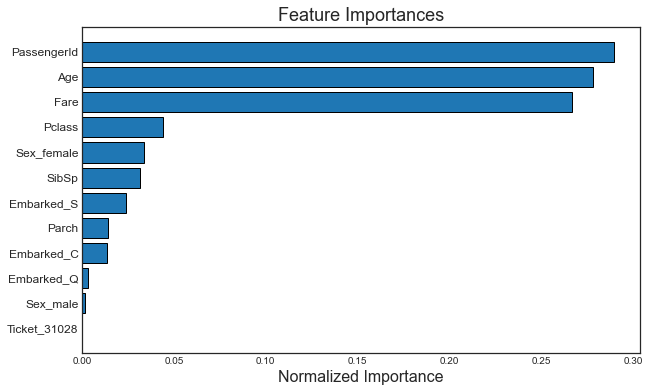

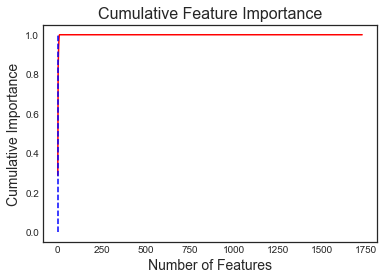

3 features required for 0.70 of cumulative importance


In [19]:
fs.plot_feature_importances(threshold=0.70, plot_n =12)

In [20]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,PassengerId,550.5,0.289371,0.289371
1,Age,529.5,0.278333,0.567704
2,Fare,507.8,0.266926,0.834630
3,Pclass,83.8,0.044050,0.878680
4,Sex_female,63.8,0.033537,0.912216
...,...,...,...,...
1725,"Name_Nakid, Miss. Maria (""Mary"")",0.0,0.000000,1.000000
1726,"Name_Najib, Miss. Adele Kiamie ""Jane""",0.0,0.000000,1.000000
1727,"Name_Naidenoff, Mr. Penko",0.0,0.000000,1.000000
1728,"Name_Myhrman, Mr. Pehr Fabian Oliver Malkolm",0.0,0.000000,1.000000


Low Importance Features

In [21]:
fs.identify_low_importance(cumulative_importance=0.99)

8 features required for cumulative importance of 0.99 after one hot encoding.
1722 features do not contribute to cumulative importance of 0.99.



Remove Features

In [22]:
all_to_remove = fs.check_removal()
all_to_remove

Total of 1727 features identified for removal


['Ticket_349224',
 'Ticket_28213',
 'Name_Boulos, Mrs. Joseph (Sultana)',
 'Ticket_3474',
 'Name_Henry, Miss. Delia',
 'Ticket_347076',
 'Name_Thorneycroft, Mr. Percival',
 'Name_Adams, Mr. John',
 'Name_Shellard, Mr. Frederick William',
 'Ticket_F.C.C. 13528',
 'Ticket_373450',
 'Ticket_PC 17485',
 'Ticket_13507',
 'Cabin_C93',
 'Name_Bracken, Mr. James H',
 'Ticket_28551',
 'Name_Niskanen, Mr. Juha',
 'Ticket_113786',
 'Ticket_13568',
 'Name_Bishop, Mr. Dickinson H',
 'Name_Herman, Miss. Alice',
 'Ticket_11753',
 'Ticket_350036',
 'Ticket_C 4001',
 'Name_Bourke, Mrs. John (Catherine)',
 'Name_Dorking, Mr. Edward Arthur',
 'Ticket_2665',
 'Ticket_14973',
 'Cabin_B5',
 'Name_West, Mr. Edwy Arthur',
 'Name_Maioni, Miss. Roberta',
 'Ticket_STON/O 2. 3101275',
 'Cabin_C47',
 'Name_Cacic, Mr. Luka',
 'Name_Moen, Mr. Sigurd Hansen',
 'Cabin_C83',
 'Name_Allison, Master. Hudson Trevor',
 'Ticket_13049',
 'Ticket_2647',
 'Cabin_E8',
 'Cabin_A34',
 'Ticket_C.A. 34651',
 'Name_Harknett, Miss. A

In [23]:
train_removed = fs.remove(methods = 'all')

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1727 features.


In [30]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=True)

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1727 features.


Running All methods at once

In [27]:
data.shape[1]

11

In [28]:
train_removed_all.shape[1]

8

In [29]:
train_removed_all

,Sex_female,Embarked_S,PassengerId,Pclass,Name,Sex,Ticket,Embarked
0,0,1,1,3,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,1,0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,1,1,3,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,1,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,0,1,5,3,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...,...,...,...,...
886,0,1,887,2,"Montvila, Rev. Juozas",male,211536,S
887,1,1,888,1,"Graham, Miss. Margaret Edith",female,112053,S
888,1,1,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,0,0,890,1,"Behr, Mr. Karl Howell",male,111369,C


Runnig all at once`

In [37]:
fs = FeatureSelector(data = data, labels=train_labels)

fs.identify_all(selection_params={
    'missing_threshold':0.6,
    'correlation_threshold':0.98,
    'task':'classification',
    'eval_metric':'auc',
    'importance_type': 'gain', 
    'cumulative_importance':0.99})
    


1 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.88531
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.922398
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.893149
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	valid_0's auc: 0.852569
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.893017
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.908366
Training until validation scores don't improve for 100 

In [39]:
train_removed_all_once = fs.remove(methods='all', keep_one_hot=True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1723 features.


In [40]:
train_removed_all_once

,Sex_female,Embarked_C,Embarked_S,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Embarked
0,0,0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,S
1,1,1,0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C
2,1,0,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,1,0,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,S
4,0,0,1,5,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,887,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,S
887,1,0,1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,S
888,1,0,1,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,W./C. 6607,23.4500,S
889,0,1,0,890,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C


In [42]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,Age,315.1,0.297714,0.297714
1,PassengerId,283.8,0.268141,0.565854
2,Fare,272.1,0.257086,0.822940
3,Pclass,59.6,0.056311,0.879252
4,Sex_female,40.0,0.037793,0.917045
...,...,...,...,...
577,Cabin_G6,0.0,0.000000,1.000000
576,Cabin_T,0.0,0.000000,1.000000
575,Cabin_E33,0.0,0.000000,1.000000
573,Cabin_E31,0.0,0.000000,1.000000
